# Datasource

https://github.com/owid/covid-19-data/tree/master/public/data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import requests
import os
#from bs4 import BeautifulSoup
#import datetime
#import re



pd.set_option("display.max.rows",None)

# Data loading and colomn selection

In [2]:
#Load the data from the internet, save it in the directory

path=r'D:\DataSets\Corona\World\CORONA_WORLD_II' #assign the path
filename='CORONA_WORLD_II_data.csv' #Assign the filename
path='/'.join(path.split('\\'))  #Change the \ into /

completeName=os.path.join(path,filename) #join them

url='https://covid.ourworldindata.org/data/owid-covid-data.csv' #URL of the data
r=requests.get(url,allow_redirects=True) #Get the data

with open(completeName, 'wb') as f:
    f.write(r.content)
#Save it in the directory with the Filename (=CompleteName) and write the content from the scrapped data

In [3]:
#path='D:\DataSets\Corona\World\CORONA_WORLD_II\owid_covid.csv'
#path="/".join(path.split('\\'))
df=pd.read_csv(completeName)

In [4]:
df_germany=df[df.location=='Germany'].copy()

In [5]:
drop_columns=['iso_code',
             'continent',
             'new_cases_smoothed',
             'new_deaths_smoothed'
             'new_tests',
             ]


for i in drop_columns:
    if i in df_germany.columns:
        df_germany.drop(labels=i,
                        axis=1,
                        inplace=True)
        

# Time series Pre-processing

In [6]:
df_germany['date']=pd.to_datetime(df_germany['date'],dayfirst=False)
df_germany.set_index(df_germany['date'],inplace=True)
df_germany=df_germany.asfreq('D')


# First Look on the data

In [7]:
f=pd.melt(df_germany,
         id_vars='date',
         value_vars=['new_cases',
                   'total_cases',
                   'new_deaths',
                   'total_deaths',
                   'icu_patients',
                   ])

#die Melt brauche ich aktuell nicht

In [8]:
#*********************************************************# 
#Änderung/Hinzufügen von Spalten zum Ändern der Auswertung#
#*********************************************************#

l=['new_cases','total_cases','new_deaths','total_deaths','icu_patients','total_cases_per_million']

In [9]:
for i in l:
    print(f'{i}: {df_germany[i].isna().any()}\nSum: {df_germany[i].isna().sum()}\n')

#Die NaNs kommen zustande, da es bis Mitte März 2020 noch keine Toten/ICU gab

new_cases: False
Sum: 0

total_cases: False
Sum: 0

new_deaths: True
Sum: 42

total_deaths: True
Sum: 42

icu_patients: True
Sum: 53

total_cases_per_million: False
Sum: 0



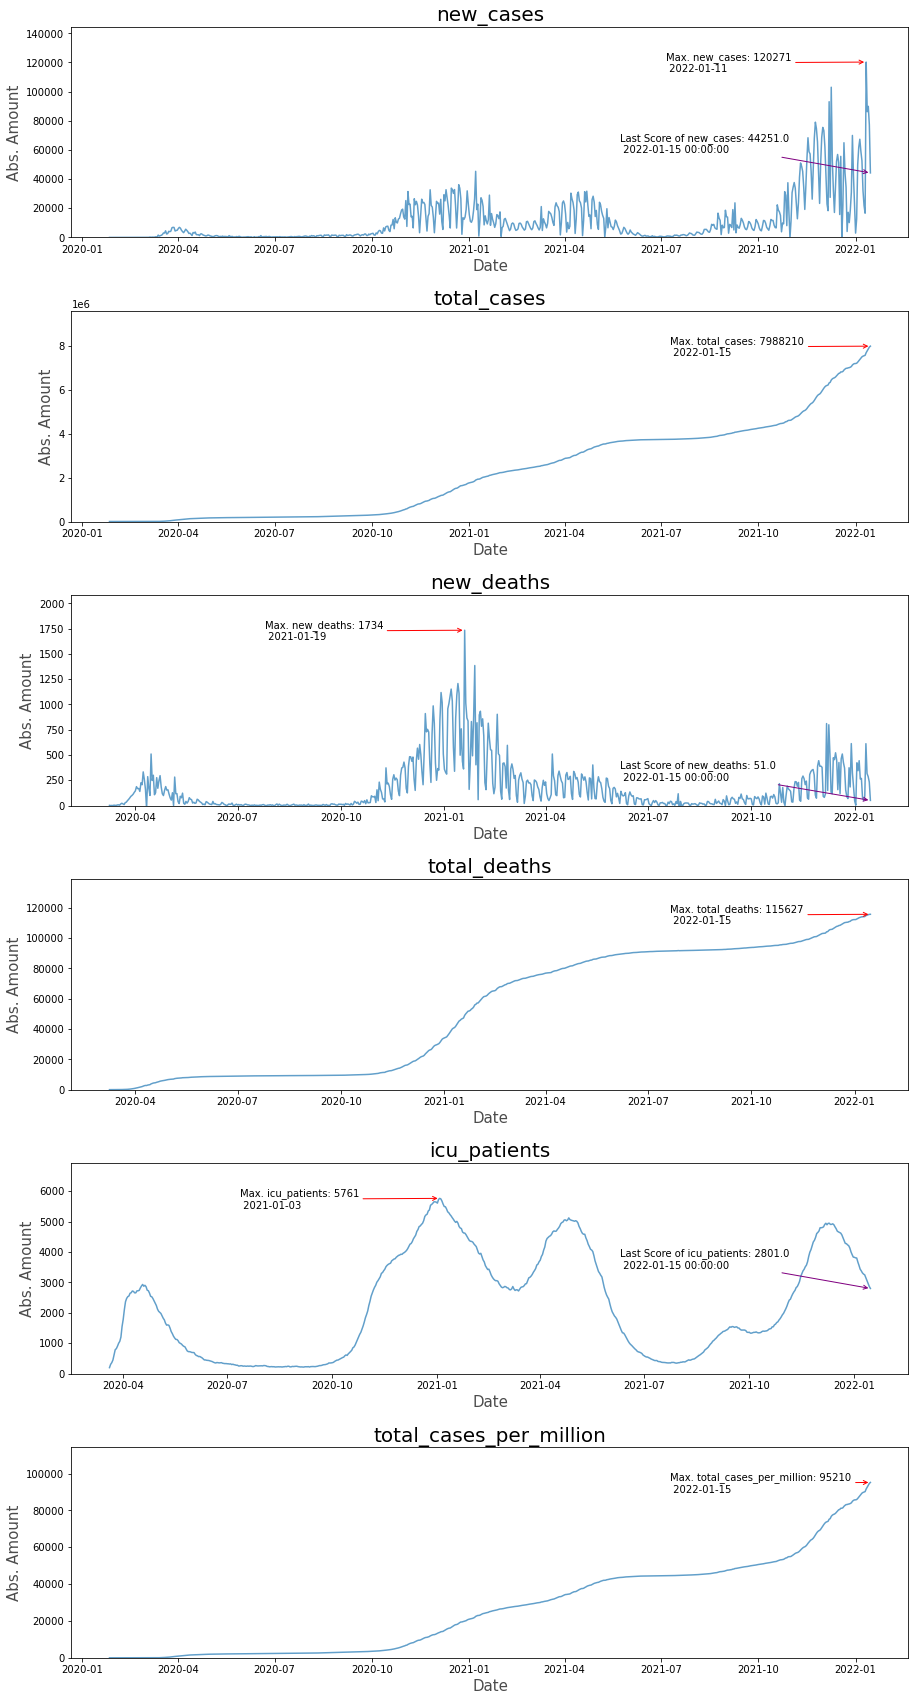

In [10]:
fig,ax=plt.subplots(nrows=len(l),ncols=1,figsize=(15,30))


for counter, value in enumerate(l):
    
    x_max_cor=df_germany[value].index[df_germany[value]==df_germany[value].max()]
    y_max_cor=df_germany[value].max()
    x_last_cor=df_germany.index[-1]
    y_last_cor=df_germany[value][-1]
    
    
    ax[counter].plot(df_germany[value],alpha=0.7)

    ax[counter].set_ylim([0,df_germany[value].max()*1.2])

    ax[counter].set_title(label=value,size=20)
    
    ax[counter].set_xlabel('Date',size=15,alpha=0.7)
    
    ax[counter].set_ylabel('Abs. Amount',size=15,alpha=0.7)


    ax[counter].annotate(text=f'Max. {value}: {int(y_max_cor)}\n {x_max_cor.date[0]}',
                  xy=[x_max_cor,y_max_cor],
                   xytext=(-200,-10),
                   textcoords='offset pixels',
                   arrowprops={'arrowstyle':'->','color':'red'}
                  )
    if x_last_cor!=x_max_cor:
        ax[counter].annotate(
            text=f'Last Score of {value}: {y_last_cor}\n {x_last_cor}',
            xy=[x_last_cor,y_last_cor],
            textcoords='offset pixels',
            xytext=(-250,20),
            arrowprops={'arrowstyle':'->','color':'purple'}
            )

      
plt.subplots_adjust(hspace=0.35, wspace=0.4)
plt.show()

fig.suptitle('OVerall')
fig.savefig('Corona_Overview.png')
##Den gleichen Facetgrid mit ncols=2 machen und andere Krankheiten Zeigen


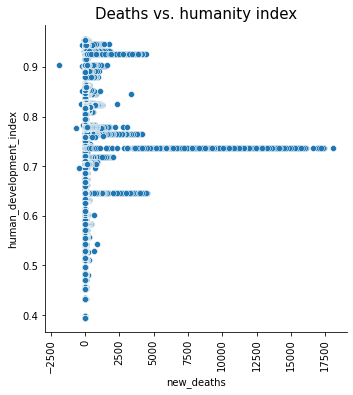

In [11]:
sns.relplot(
    data=df,
    kind='scatter',
    x=df.new_deaths,
    y=df.human_development_index

)

plt.title('Deaths vs. humanity index',size=15)
plt.xticks(rotation=90)
plt.show()

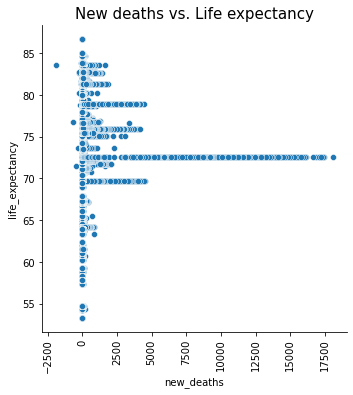

In [12]:
sns.relplot(
    data=df,
    x=df.new_deaths,
    y=df.life_expectancy,
    kind='scatter'
    )

plt.title('New deaths vs. Life expectancy', size=15)
plt.xticks(rotation=90)
plt.show()

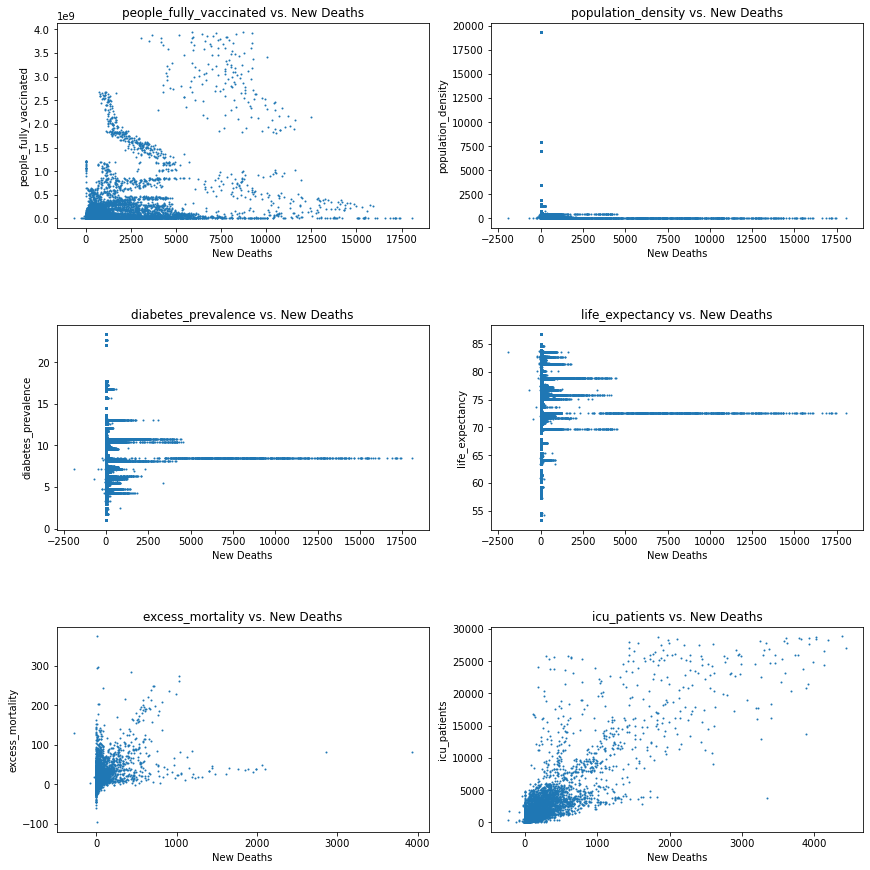

In [70]:
quantitative=[i for i in df_germany.columns if df_germany.dtypes[i]!='object']

l_cor=['population_density','diabetes_prevalence','life_expectancy',
       'excess_mortality','icu_patients','people_fully_vaccinated',]
#l_cor=quantitative

#number of subplots
Tot=len(l_cor)

#number of cols
Cols=2

#Required Rows
Rows=Tot//Cols

Rows+=Tot%Cols

# %--> Reminder from a division
# // Division without reminder


#Position Index
Position=range(1,Tot+1)

#Create figure
x=df.new_deaths

fig2=plt.figure(1,figsize=(12,12))
for k in range(Tot):
    ax=fig2.add_subplot(Rows,Cols,Position[k])
    
    y=df[l_cor[k-1]]
    ax.scatter(x,y,s=1)
    plt.xlabel('New Deaths')
    plt.ylabel(l_cor[k-1])
    plt.title(f'{l_cor[k-1]} vs. New Deaths')
      
fig2.savefig('Corona_Overview2.png')    
    
#plt.subplots_adjust(hspace=0.8, wspace=0.6)    
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)
plt.show()

https://stackoverflow.com/questions/12319796/dynamically-add-create-subplots-in-matplotlib

Solution for the problem


In [14]:
df_germany_grouped=df_germany.groupby('new_deaths')
print(df_germany_grouped)

In [42]:
df_germany['people_fully_vaccinated']

date
2020-01-27           NaN
2020-01-28           NaN
2020-01-29           NaN
2020-01-30           NaN
2020-01-31           NaN
2020-02-01           NaN
2020-02-02           NaN
2020-02-03           NaN
2020-02-04           NaN
2020-02-05           NaN
2020-02-06           NaN
2020-02-07           NaN
2020-02-08           NaN
2020-02-09           NaN
2020-02-10           NaN
2020-02-11           NaN
2020-02-12           NaN
2020-02-13           NaN
2020-02-14           NaN
2020-02-15           NaN
2020-02-16           NaN
2020-02-17           NaN
2020-02-18           NaN
2020-02-19           NaN
2020-02-20           NaN
2020-02-21           NaN
2020-02-22           NaN
2020-02-23           NaN
2020-02-24           NaN
2020-02-25           NaN
2020-02-26           NaN
2020-02-27           NaN
2020-02-28           NaN
2020-02-29           NaN
2020-03-01           NaN
2020-03-02           NaN
2020-03-03           NaN
2020-03-04           NaN
2020-03-05           NaN
2020-03-06          

[2020, 2021, 2022]


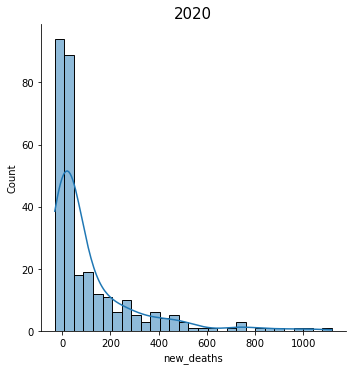

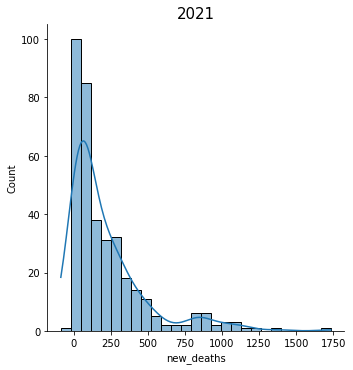

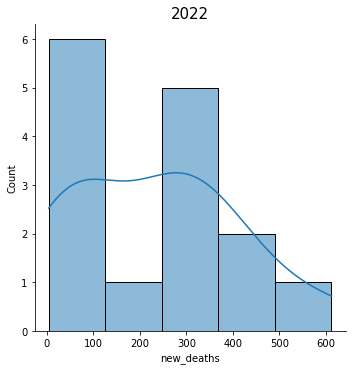

In [16]:

years=list(set(df_germany.index.year))
df_germany['year']=df_germany.index.year

for yr in years:
    
    sns.displot(
            data=df_germany[df_germany.year==yr],
            x=df_germany.new_deaths[df_germany.year==yr],
            kde=True,
            kind='hist'
           

    )
    plt.title(yr,size=15)
  
    
    #ax[counter].set_ylim([0,df_germany[value].max()*1.2])
yr
print(years)

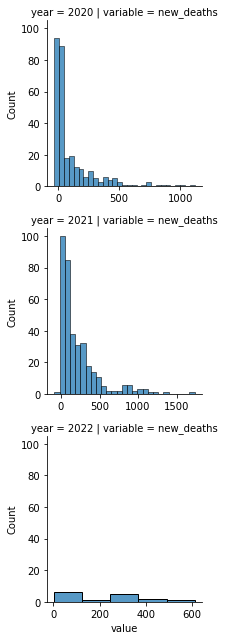

In [17]:
f=pd.melt(
    frame=df_germany,
    id_vars=['date','year'],
    value_vars='new_deaths'    
)

g=sns.FacetGrid(
    data=f,
    col='variable',
    sharey=True,
    sharex=False,
    row='year'

)


g=g.map(sns.histplot,'value')

plt.show()


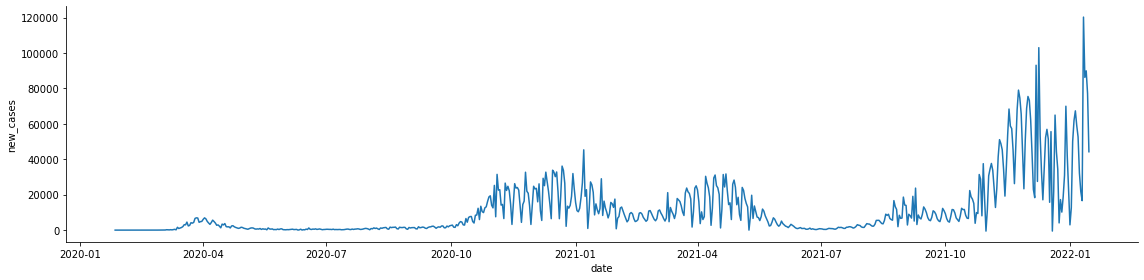

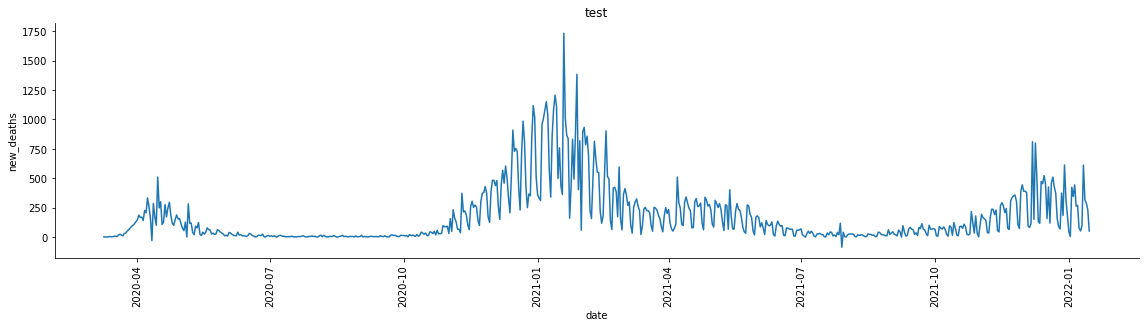

In [18]:
sns.relplot(
    data=df_germany,
    kind='line',
    x=df_germany.index,
    y=df_germany.new_cases,
    height=4.0,
    aspect=4.0
    


)

sns.relplot(
    data=df_germany,
    kind='line',
    x=df_germany.index,
    y=df_germany.new_deaths,
    height=4.0,
    aspect=4.0
    


)


plt.title('test')
plt.xticks(rotation=90)
plt.show()

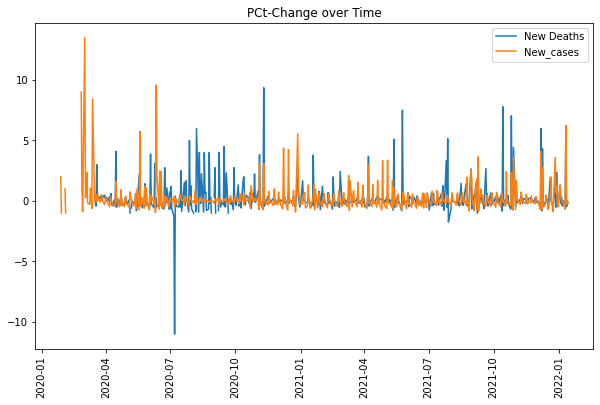

In [19]:
df_germany_quart=df_germany.asfreq('B')
plt.figure(1,figsize=(10,6))
plt.plot(df_germany_quart.new_deaths.pct_change(),label='New Deaths')
plt.plot(df_germany_quart.new_cases.pct_change(),label='New_cases')
plt.legend()
plt.xticks(rotation=90)
plt.title('PCt-Change over Time')
plt.show()

In [20]:
df_germany['new_cases_pctChange']=df_germany.new_cases.pct_change()
df_germany['new_deaths_pctChange']=df_germany.new_deaths.pct_change()
df_germany[['new_cases','new_cases_pctChange','new_deaths','new_deaths_pctChange']].loc['2021-7-5':]

,new_cases,new_cases_pctChange,new_deaths,new_deaths_pctChange
date,,,,
2021-07-05,392.0,-0.046229,29.0,-30.000000
2021-07-06,713.0,0.818878,50.0,0.724138
2021-07-07,992.0,0.391304,30.0,-0.400000
2021-07-08,903.0,-0.089718,49.0,0.633333
2021-07-09,885.0,-0.019934,35.0,-0.285714
2021-07-10,809.0,-0.085876,7.0,-0.800000
2021-07-11,568.0,-0.297899,2.0,-0.714286
2021-07-12,553.0,-0.026408,27.0,12.500000
2021-07-13,1027.0,0.857143,27.0,0.000000


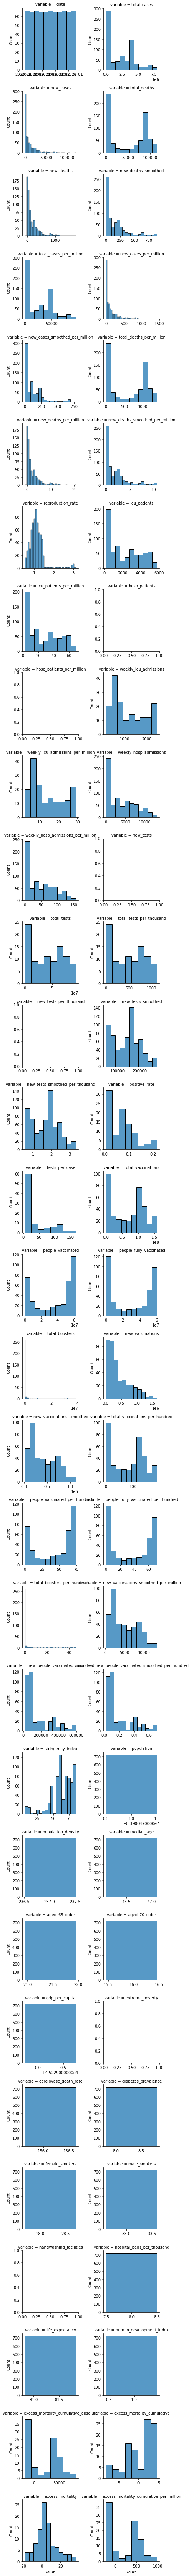

In [21]:
df_germany['Dateindex']=df_germany.index
f=pd.melt(frame=df_germany,
        id_vars='Dateindex',
        value_vars=quantitative
         )


f.Dateindex=pd.to_datetime(f.Dateindex)

g=sns.FacetGrid(
    data=f,
    col='variable',
    sharex=False,
    sharey=False,
    col_wrap=2
)

g=g.map(sns.histplot,'value')


plt.show()


TypeError: Vertical orientation requires numeric `y` variable.

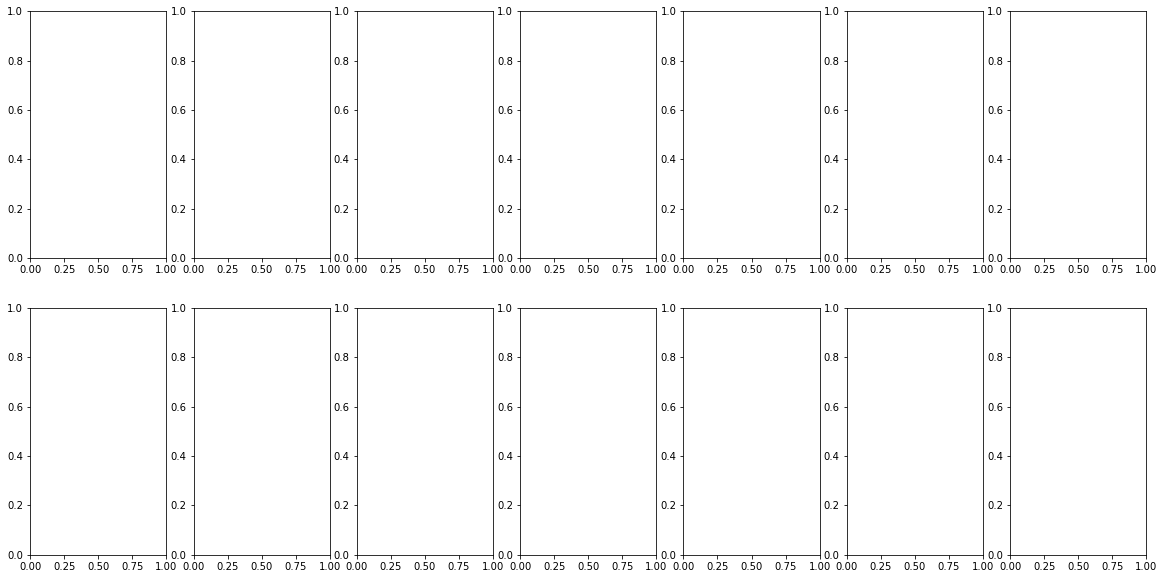

In [22]:


fig_bp, axs_bp = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs_bp = axs_bp.flatten()
for k,v in df_germany[quantitative].items():
    sns.boxplot(y=k, data=df_germany[quantitative], ax=axs_bp[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

https://www.kaggle.com/prasadperera/the-boston-housing-dataset

In [ ]:
for k,v in df_germany[quantitative].items():
    print(k,v)

#Warum ist K nur die date-Spalte?

In [ ]:
df_germany[quantitative]